In [ ]:
# import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Get Data
url = 'https://raw.githubusercontent.com/rawisara01/DSI314/main/Gradient%20boosting%20classifier/combined_files.csv'
df =pd.read_csv(url)
df

,Unnamed: 0,ปีที่เกิดเหตุ,วันที่เกิดเหตุ,เวลา,สายทาง,จังหวัด,ประเภทรถ,บริเวณที่เกิดเหตุ/ลักษณะทาง,ลักษณะการเกิดอุบัติเหตุ,จำนวนรถที่เกิดเหตุ (รวมคันที่ 1),จำนวนผู้เสียชีวิต,รวมจำนวนผู้บาดเจ็บ,สภาพอากาศ,Condition
0,0,2019,1/1/2019,3:05,บางพลี-สุขสวัสดิ์,กรุงเทพมหานคร,NaN,อื่นๆ,NaN,1,0,1,แจ่มใส,Fair
1,1,2019,1/1/2019,5:42,บางนา-ชลบุรี,กรุงเทพมหานคร,อื่นๆ,ทางตรง,NaN,1,0,0,แจ่มใส,Fair
2,2,2019,1/1/2019,10:10,ดาวคะนอง - แสมดำ,กรุงเทพมหานคร,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,ทางตรง+ไม่มีความลาดชัน,ชนท้าย,2,0,0,แจ่มใส,Fair
3,3,2019,1/1/2019,17:30,อรุณอมรินทร์ - พุทธมณฑลสาย 4,กรุงเทพมหานคร,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,ทางตรง+ไม่มีความลาดชัน,ชนท้าย,2,0,0,แจ่มใส,Fair
4,4,2019,1/1/2019,19:20,อรุณอมรินทร์ - พุทธมณฑลสาย 4,กรุงเทพมหานคร,รถปิคอัพบรรทุก 4 ล้อ,ทางตรง+ไม่มีความลาดชัน,ชนท้าย,2,0,1,แจ่มใส,Fair
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5727,5727,2022,29/9/2022,23:40,รามอินทรา-อาจณรงค์,กรุงเทพมหานคร,NaN,ทางตรง,อื่นๆ,1,0,0,ฝนตก,NaN
5728,5728,2022,30/9/2022,9:21,แจ้งวัฒนะ-พญาไท,กรุงเทพมหานคร,NaN,ทางโค้งกว้าง,ชนสิ่งกีดขวาง (บนผิวจราจร),1,0,0,แจ่มใส,NaN
5729,5729,2022,30/9/2022,18:04,แขวงคลองสองต้นนุ่น - พิมพา,กรุงเทพมหานคร,รถปิคอัพบรรทุก 4 ล้อ,ทางตรง+ไม่มีความลาดชัน,ชนท้าย,3,0,0,แจ่มใส,NaN
5730,5730,2022,30/9/2022,18:48,รามอินทรา-อาจณรงค์,กรุงเทพมหานคร,NaN,ทางตรง,ชนท้าย,4,0,0,แจ่มใส,NaN


In [ ]:
# ลบคอลัมน์ที่ไม่ได้ใช้งาน
df.drop(['Unnamed: 0', 'ปีที่เกิดเหตุ', 'ลักษณะการเกิดอุบัติเหตุ', 'จำนวนรถที่เกิดเหตุ (รวมคันที่ 1)', 'จังหวัด', 'สภาพอากาศ'], inplace=True, axis=1)

In [ ]:
#เปลี่ยนชื่อคอลัมน์
df.rename(columns = {'วันที่เกิดเหตุ':'date_acc', 
                     'เวลา':'time_acc', 
                     'สายทาง':'route_acc', 
                     'ประเภทรถ':'type_acc', 
                     'บริเวณที่เกิดเหตุ/ลักษณะทาง':'scene/road surface', 
                     'จำนวนผู้เสียชีวิต':'num_death', 
                     'รวมจำนวนผู้บาดเจ็บ':'num_injured', 
                     'สภาพอากาศ':'climate_acc','Condition':'cnd_acc'}, inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   date_acc            5732 non-null   object
 1   time_acc            5732 non-null   object
 2   route_acc           5725 non-null   object
 3   type_acc            5060 non-null   object
 4   scene/road surface  5312 non-null   object
 5   num_death           5732 non-null   int64 
 6   num_injured         5732 non-null   int64 
 7   cnd_acc             5687 non-null   object
dtypes: int64(2), object(6)
memory usage: 358.4+ KB


#Data Preprocessing

In [ ]:
# แยก date_acc และสร้างคอลัมน์ date_acc, month_acc, years_acc
df[['day_acc', 'month_acc', 'years_acc']] = df['date_acc'].str.split('/', expand=True)
df = df.drop(columns=["date_acc", ])

# แยก time_acc และสร้างคอลัมน์ hours_acc, minutes_acc 
df[['hours_acc', 'minutes_acc']] = df['time_acc'].str.split(':', expand=True)
df = df.drop(columns=["time_acc"])

# แยก scene/road surface และสร้างคอลัมน์ scene_acc, road_surface
df[['scene_acc', 'road_surface']] = df['scene/road surface'].str.split('+', expand=True)
df = df.drop(columns=["scene/road surface"])
df

,route_acc,type_acc,num_death,num_injured,cnd_acc,day_acc,month_acc,years_acc,hours_acc,minutes_acc,scene_acc,road_surface
0,บางพลี-สุขสวัสดิ์,NaN,0,1,Fair,1,1,2019,3,05,อื่นๆ,None
1,บางนา-ชลบุรี,อื่นๆ,0,0,Fair,1,1,2019,5,42,ทางตรง,None
2,ดาวคะนอง - แสมดำ,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,0,0,Fair,1,1,2019,10,10,ทางตรง,ไม่มีความลาดชัน
3,อรุณอมรินทร์ - พุทธมณฑลสาย 4,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,0,0,Fair,1,1,2019,17,30,ทางตรง,ไม่มีความลาดชัน
4,อรุณอมรินทร์ - พุทธมณฑลสาย 4,รถปิคอัพบรรทุก 4 ล้อ,0,1,Fair,1,1,2019,19,20,ทางตรง,ไม่มีความลาดชัน
...,...,...,...,...,...,...,...,...,...,...,...,...
5727,รามอินทรา-อาจณรงค์,NaN,0,0,NaN,29,9,2022,23,40,ทางตรง,None
5728,แจ้งวัฒนะ-พญาไท,NaN,0,0,NaN,30,9,2022,9,21,ทางโค้งกว้าง,None
5729,แขวงคลองสองต้นนุ่น - พิมพา,รถปิคอัพบรรทุก 4 ล้อ,0,0,NaN,30,9,2022,18,04,ทางตรง,ไม่มีความลาดชัน
5730,รามอินทรา-อาจณรงค์,NaN,0,0,NaN,30,9,2022,18,48,ทางตรง,None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   route_acc     5725 non-null   object
 1   type_acc      5060 non-null   object
 2   num_death     5732 non-null   int64 
 3   num_injured   5732 non-null   int64 
 4   cnd_acc       5687 non-null   object
 5   day_acc       5732 non-null   object
 6   month_acc     5732 non-null   object
 7   years_acc     5732 non-null   object
 8   hours_acc     5732 non-null   object
 9   minutes_acc   5732 non-null   object
 10  scene_acc     5312 non-null   object
 11  road_surface  4422 non-null   object
dtypes: int64(2), object(10)
memory usage: 537.5+ KB


In [ ]:
# แปลงข้อมูลให้เป็น int ตามความเหมาะสม
df[['hours_acc', 'minutes_acc']] = df[['hours_acc', 'minutes_acc']].astype(str).astype(int)

In [ ]:
# สร้างเงื่อนไขสำหรับช่วงเวลา
conditions_time = [
    (df['hours_acc'] >= 0) & (df['hours_acc'] <= 3),
    (df['hours_acc'] >= 4) & (df['hours_acc'] <= 7),
    (df['hours_acc'] >= 8) & (df['hours_acc'] <= 11),
    (df['hours_acc'] >= 12) & (df['hours_acc'] <= 15),
    (df['hours_acc'] >= 16) & (df['hours_acc'] <= 19),
    (df['hours_acc'] >= 20) & (df['hours_acc'] <= 23),
    ]

# แบ่งช่วงเวลา
values_time = ['0', '1', '2', '3', '4','5']

# สร้างคอลัมน์ time
df['time_acc'] = np.select(conditions_time, values_time)

In [ ]:
# สร้างเงื่อนไขสำหรับระดับความรุนแรง
conditions_acc = [
    (df['num_injured'] <= 0) & (df['num_death'] <= 0),
    (df['num_injured'] > 0) & (df['num_death'] <= 0),
    (df['num_injured'] >= 0) & (df['num_death'] > 0),
    ]

# แบ่งระดับความรุนแรง
values_acc = [ 'ACC', 'INJ', 'DIE' ]

# สร้างคอลลัมน์ Level_acc
df['level_acc'] = np.select(conditions_acc, values_acc)

df = df.drop(columns=["num_injured"])
df = df.drop(columns=["num_death"])

In [ ]:
df.dtypes

route_acc       object
type_acc        object
cnd_acc         object
day_acc         object
month_acc       object
years_acc       object
hours_acc        int64
minutes_acc      int64
scene_acc       object
road_surface    object
time_acc        object
level_acc       object
dtype: object

In [ ]:
# ตรวจสอบจำนวน missing values
df.isnull().sum()

route_acc          7
type_acc         672
cnd_acc           45
day_acc            0
month_acc          0
years_acc          0
hours_acc          0
minutes_acc        0
scene_acc        420
road_surface    1310
time_acc           0
level_acc          0
dtype: int64

In [ ]:
# เติม missing values ด้วย bfill
df['cnd_acc'].fillna(df['cnd_acc'].bfill()[0], inplace=True)
df['type_acc'].fillna(df['type_acc'].bfill()[0], inplace=True)
df['road_surface'].fillna(df['road_surface'].bfill()[0], inplace=True)
df['scene_acc'].fillna(df['scene_acc'].bfill()[0], inplace=True)

--------------------------------------------------------------------

#Exploratory Data Analysis (EDA)

In [ ]:
# copy df to df_EDA
df_EDA = df.copy()

# ลบคอลัมน์ที่ไม่ใช้งาน
df_EDA.drop('route_acc', inplace=True, axis=1)

In [ ]:
# โหลด font ภาษาไทยสำหรับการ plot กราฟ
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
 
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [ ]:
# สร้างฟังก์ชันสำหรับกราฟแท่ง
def val_count_BarPlot(data=None, count_cols=None):
      data_count = data[count_cols].value_counts()
      fig, ax = plt.subplots(figsize=(8, 6))
      pbar = ax.bar(data_count.index.astype(str), data_count.values)
      # ax.bar_label(pbar, [num for num in data_count.values])
      ax.set_title(f"{count_cols} values count")
      plt.show

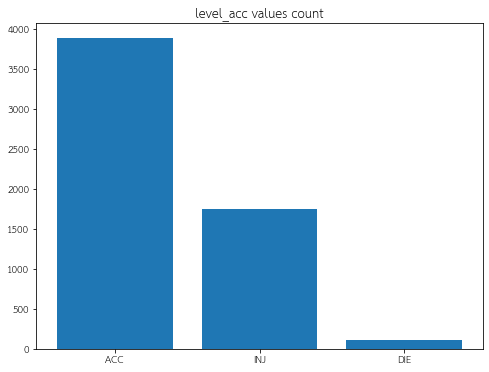

In [ ]:
# กราฟแท่งของระดับความรุนแรง
val_count_BarPlot(data=df_EDA, count_cols='level_acc')

In [ ]:
# จำนวนของระดับความรุนแรง
df_EDA.level_acc.value_counts()

ACC    3884
INJ    1744
DIE     104
Name: level_acc, dtype: int64

1 level_acc
ACC    146
INJ     53
DIE      6
Name: level_acc, dtype: int64 

2 level_acc
ACC    133
INJ     57
DIE      4
Name: level_acc, dtype: int64 

3 level_acc
ACC    114
INJ     54
DIE      3
Name: level_acc, dtype: int64 

4 level_acc
ACC    128
INJ     55
DIE      2
Name: level_acc, dtype: int64 

5 level_acc
ACC    121
INJ     53
DIE      3
Name: level_acc, dtype: int64 

6 level_acc
ACC    115
INJ     58
DIE      7
Name: level_acc, dtype: int64 

7 level_acc
ACC    123
INJ     65
DIE      3
Name: level_acc, dtype: int64 

8 level_acc
ACC    127
INJ     46
DIE      3
Name: level_acc, dtype: int64 

9 level_acc
ACC    149
INJ     59
DIE      5
Name: level_acc, dtype: int64 

10 level_acc
ACC    139
INJ     55
DIE      2
Name: level_acc, dtype: int64 

11 level_acc
ACC    122
INJ     58
DIE      5
Name: level_acc, dtype: int64 

12 level_acc
ACC    122
INJ     56
DIE      3
Name: level_acc, dtype: int64 

13 level_acc
ACC    120
INJ     52
DIE      3
Name: level_acc, dtype: int

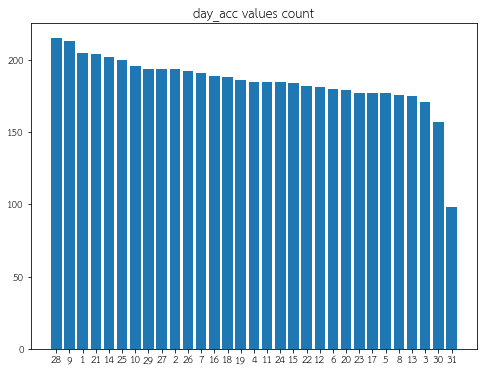

In [ ]:
#กราฟแท่งของคอลัมน์ day_acc
val_count_BarPlot(data=df_EDA, count_cols='day_acc')

# day_acc เทียบกับ level_acc
for val in list(df['day_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['day_acc']==val]['level_acc'].value_counts(),"\n")

1 level_acc
ACC    326
INJ    161
DIE     12
Name: level_acc, dtype: int64 

2 level_acc
ACC    333
INJ    149
DIE      4
Name: level_acc, dtype: int64 

3 level_acc
ACC    377
INJ    151
DIE      7
Name: level_acc, dtype: int64 

4 level_acc
ACC    332
INJ    172
DIE     13
Name: level_acc, dtype: int64 

5 level_acc
ACC    331
INJ    131
DIE     11
Name: level_acc, dtype: int64 

6 level_acc
ACC    315
INJ    110
DIE      5
Name: level_acc, dtype: int64 

7 level_acc
ACC    357
INJ    164
DIE      9
Name: level_acc, dtype: int64 

8 level_acc
ACC    336
INJ    154
DIE      8
Name: level_acc, dtype: int64 

9 level_acc
ACC    379
INJ    154
DIE      8
Name: level_acc, dtype: int64 

10 level_acc
ACC    290
INJ    136
DIE     10
Name: level_acc, dtype: int64 

11 level_acc
ACC    246
INJ    101
DIE      8
Name: level_acc, dtype: int64 

12 level_acc
ACC    262
INJ    161
DIE      9
Name: level_acc, dtype: int64 



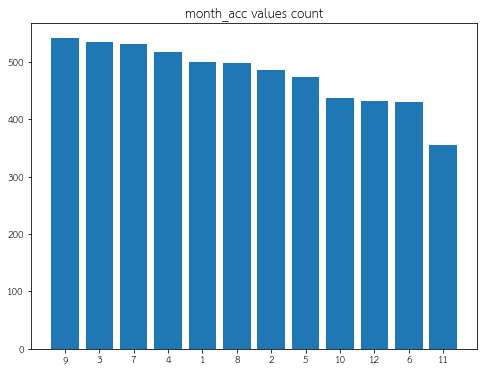

In [ ]:
#กราฟแท่งของคอลัมน์ month_acc
val_count_BarPlot(data=df_EDA, count_cols='month_acc')

# month_acc เทียบกับ level_acc
for val in list(df['month_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['month_acc']==val]['level_acc'].value_counts(),"\n")

2019 level_acc
ACC    994
INJ    408
DIE     20
Name: level_acc, dtype: int64 

2020 level_acc
ACC    1036
INJ     523
DIE      26
Name: level_acc, dtype: int64 

2021 level_acc
ACC    985
INJ    422
DIE     35
Name: level_acc, dtype: int64 

2022 level_acc
ACC    869
INJ    391
DIE     23
Name: level_acc, dtype: int64 



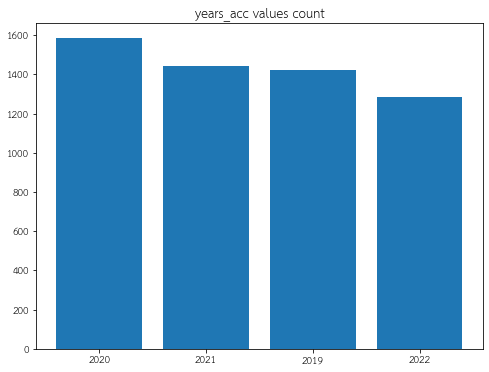

In [ ]:
#กราฟแท่งของคอลัมน์ years_acc
val_count_BarPlot(data=df_EDA, count_cols='years_acc')

# years_acc เทียบกับ level_acc
for val in list(df['years_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['years_acc']==val]['level_acc'].value_counts(),"\n")

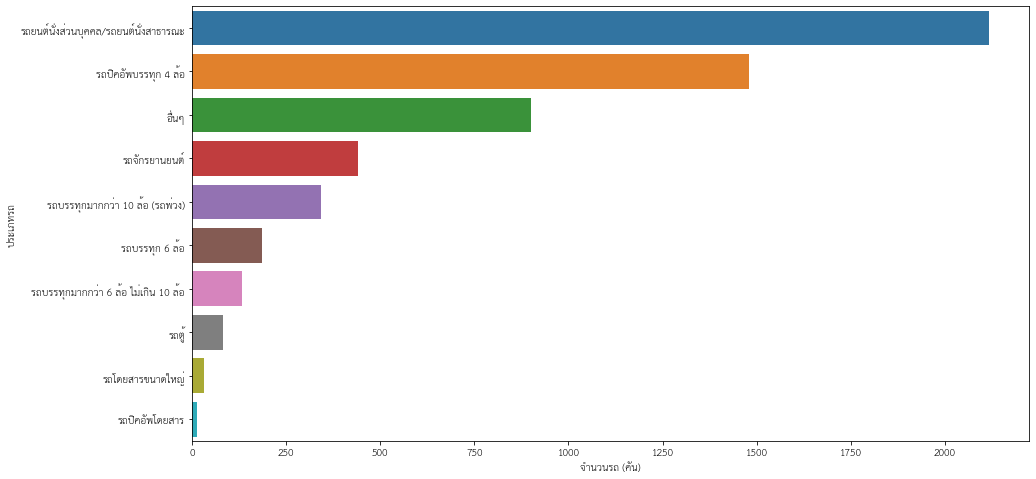

In [ ]:
#กราฟแท่งของคอลัมน์ type_acc
type_acc = df_EDA['type_acc'].value_counts().head(10).index
plt.figure(figsize=(15, 8))
sns.countplot(data=df_EDA, y='type_acc', order=type_acc)
plt.xlabel('จำนวนรถ (คัน)')
plt.ylabel('ประเภทรถ');

In [ ]:
# type_acc เทียบกับ level_acc
for val in list(df['type_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['type_acc']==val]['level_acc'].value_counts(),"\n")

อื่นๆ level_acc
ACC    705
INJ    185
DIE     10
Name: level_acc, dtype: int64 

รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ level_acc
ACC    1478
INJ     620
DIE      19
Name: level_acc, dtype: int64 

รถปิคอัพบรรทุก 4 ล้อ level_acc
ACC    1043
INJ     424
DIE      12
Name: level_acc, dtype: int64 

รถตู้ level_acc
ACC    47
INJ    32
DIE     3
Name: level_acc, dtype: int64 

รถบรรทุก 6 ล้อ level_acc
ACC    128
INJ     48
DIE     10
Name: level_acc, dtype: int64 

รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง) level_acc
ACC    237
INJ    101
DIE      4
Name: level_acc, dtype: int64 

รถโดยสารขนาดใหญ่ level_acc
ACC    24
INJ     6
DIE     1
Name: level_acc, dtype: int64 

รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ level_acc
ACC    87
INJ    42
DIE     4
Name: level_acc, dtype: int64 

รถจักรยานยนต์ level_acc
INJ    275
ACC    127
DIE     38
Name: level_acc, dtype: int64 

รถปิคอัพโดยสาร level_acc
INJ    7
ACC    6
Name: level_acc, dtype: int64 

รถสามล้อเครื่อง level_acc
INJ    3
ACC    2
Name: level_acc, dtype:

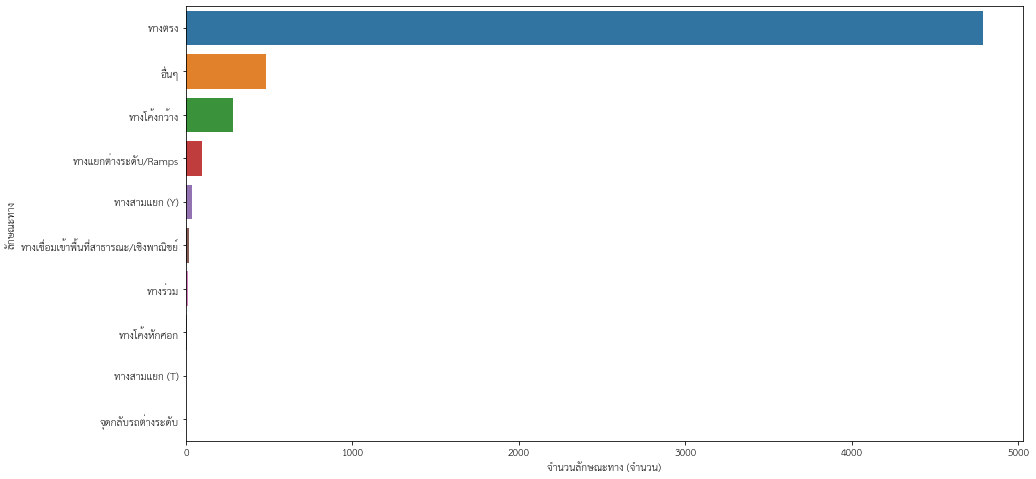

In [ ]:
#กราฟแท่งของคอลัมน์ scene_acc
scene_acc = df_EDA['scene_acc'].value_counts().head(10).index
plt.figure(figsize=(15, 8))
sns.countplot(data=df_EDA, y='scene_acc', order=scene_acc)
plt.xlabel('จำนวนลักษณะทาง (จำนวน)')
plt.ylabel('ลักษณะทาง');

In [ ]:
# scene_acc เทียบกับ level_acc
for val in list(df['scene_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['scene_acc']==val]['level_acc'].value_counts(),"\n")

อื่นๆ level_acc
ACC    334
INJ    131
DIE     17
Name: level_acc, dtype: int64 

ทางตรง level_acc
ACC    3235
INJ    1479
DIE      75
Name: level_acc, dtype: int64 

ทางโค้งกว้าง level_acc
ACC    191
INJ     85
DIE      7
Name: level_acc, dtype: int64 

ทางแยกต่างระดับ/Ramps level_acc
ACC    63
INJ    30
DIE     3
Name: level_acc, dtype: int64 

ทางเชื่อมเข้าพื้นที่สาธารณะ/เชิงพาณิชย์ level_acc
ACC    10
INJ     6
DIE     1
Name: level_acc, dtype: int64 

ทางโค้งหักศอก level_acc
ACC    7
INJ    1
DIE    1
Name: level_acc, dtype: int64 

ทางสามแยก (Y) level_acc
ACC    31
INJ     6
Name: level_acc, dtype: int64 

ทางร่วม level_acc
ACC    9
INJ    4
Name: level_acc, dtype: int64 

ทางสามแยก (T) level_acc
ACC    2
Name: level_acc, dtype: int64 

จุดกลับรถต่างระดับ level_acc
ACC    2
Name: level_acc, dtype: int64 

ทางเชื่อมเข้าพื้นที่ส่วนบุคคล level_acc
INJ    1
Name: level_acc, dtype: int64 

ทางสี่แยก level_acc
INJ    1
Name: level_acc, dtype: int64 



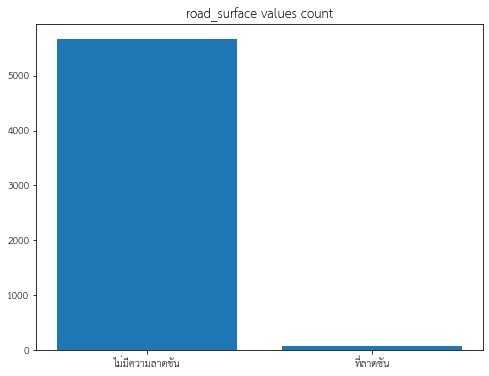

In [ ]:
#กราฟแท่งของคอลัมน์ road_surface
val_count_BarPlot(data=df_EDA, count_cols='road_surface')

In [ ]:
# road_surface เทียบกับ level_acc
for val in list(df['road_surface'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['road_surface']==val]['level_acc'].value_counts(),"\n")

ไม่มีความลาดชัน level_acc
ACC    3855
INJ    1709
DIE      96
Name: level_acc, dtype: int64 

ที่ลาดชัน level_acc
INJ    35
ACC    29
DIE     8
Name: level_acc, dtype: int64 



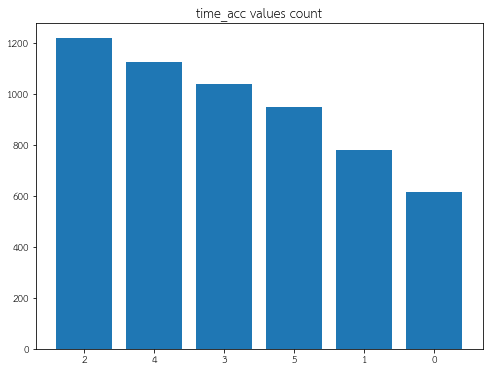

In [ ]:
#กราฟแท่งของคอลัมน์ time_acc
val_count_BarPlot(data=df_EDA, count_cols='time_acc')

In [ ]:
# time_acc เทียบกับ level_acc
for val in list(df['time_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['time_acc']==val]['level_acc'].value_counts(),"\n")

0 level_acc
ACC    341
INJ    251
DIE     24
Name: level_acc, dtype: int64 

1 level_acc
ACC    516
INJ    244
DIE     22
Name: level_acc, dtype: int64 

2 level_acc
ACC    892
INJ    318
DIE      9
Name: level_acc, dtype: int64 

4 level_acc
ACC    799
INJ    319
DIE      9
Name: level_acc, dtype: int64 

5 level_acc
ACC    566
INJ    351
DIE     30
Name: level_acc, dtype: int64 

3 level_acc
ACC    770
INJ    261
DIE     10
Name: level_acc, dtype: int64 



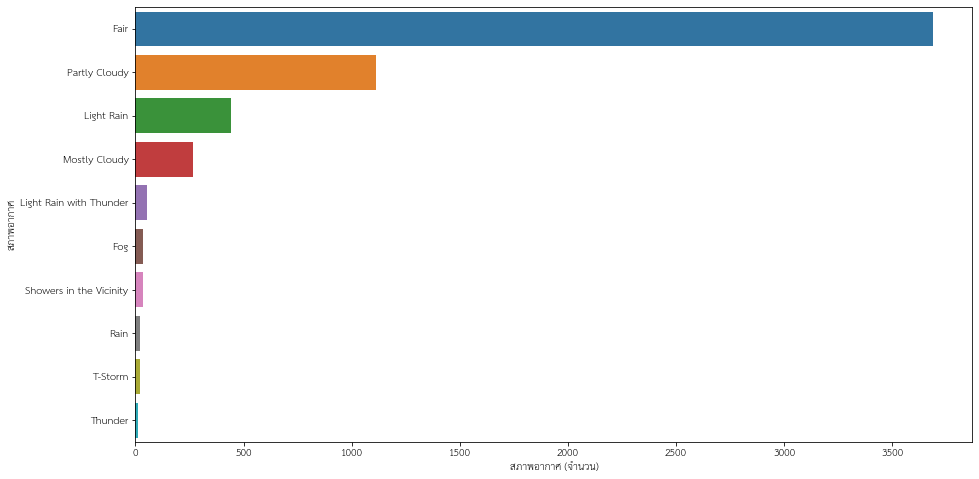

In [ ]:
#กราฟแท่งของคอลัมน์ _acc
cnd_acc = df_EDA['cnd_acc'].value_counts().head(10).index
plt.figure(figsize=(15, 8))
sns.countplot(data=df_EDA, y='cnd_acc', order=cnd_acc)
plt.xlabel('สภาพอากาศ (จำนวน)')
plt.ylabel('สภาพอากาศ');

In [ ]:
# cnd_acc เทียบกับ level_acc
for val in list(df['cnd_acc'].unique()):
  print(f"{val} level_acc")
  print(df.loc[df['cnd_acc']==val]['level_acc'].value_counts(),"\n")

Fair level_acc
ACC    2463
INJ    1156
DIE      68
Name: level_acc, dtype: int64 

Mostly Cloudy level_acc
ACC    181
INJ     78
DIE      6
Name: level_acc, dtype: int64 

Partly Cloudy level_acc
ACC    779
INJ    313
DIE     22
Name: level_acc, dtype: int64 

Light Rain level_acc
ACC    310
INJ    124
DIE      7
Name: level_acc, dtype: int64 

Fog level_acc
ACC    21
INJ    15
Name: level_acc, dtype: int64 

Haze level_acc
ACC    4
INJ    1
Name: level_acc, dtype: int64 

Cloudy level_acc
ACC    3
Name: level_acc, dtype: int64 

Showers in the Vicinity level_acc
ACC    19
INJ    14
Name: level_acc, dtype: int64 

Light Rain with Thunder level_acc
ACC    37
INJ    16
DIE     1
Name: level_acc, dtype: int64 

T-Storm / Windy level_acc
ACC    3
Name: level_acc, dtype: int64 

T-Storm level_acc
ACC    14
INJ     6
Name: level_acc, dtype: int64 

Light Rain Shower level_acc
ACC    3
INJ    2
Name: level_acc, dtype: int64 

Thunder level_acc
ACC    8
INJ    5
Name: level_acc, dtype: int64 


---------------------------------------------

##Heatmap

In [ ]:
# copy df ลงใน Htm
df_Htm = df.copy()
df_Htm

,route_acc,type_acc,cnd_acc,day_acc,month_acc,years_acc,hours_acc,minutes_acc,scene_acc,road_surface,time_acc,level_acc
0,บางพลี-สุขสวัสดิ์,อื่นๆ,Fair,1,1,2019,3,5,อื่นๆ,ไม่มีความลาดชัน,0,INJ
1,บางนา-ชลบุรี,อื่นๆ,Fair,1,1,2019,5,42,ทางตรง,ไม่มีความลาดชัน,1,ACC
2,ดาวคะนอง - แสมดำ,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,Fair,1,1,2019,10,10,ทางตรง,ไม่มีความลาดชัน,2,ACC
3,อรุณอมรินทร์ - พุทธมณฑลสาย 4,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,Fair,1,1,2019,17,30,ทางตรง,ไม่มีความลาดชัน,4,ACC
4,อรุณอมรินทร์ - พุทธมณฑลสาย 4,รถปิคอัพบรรทุก 4 ล้อ,Fair,1,1,2019,19,20,ทางตรง,ไม่มีความลาดชัน,4,INJ
...,...,...,...,...,...,...,...,...,...,...,...,...
5727,รามอินทรา-อาจณรงค์,อื่นๆ,Fair,29,9,2022,23,40,ทางตรง,ไม่มีความลาดชัน,5,ACC
5728,แจ้งวัฒนะ-พญาไท,อื่นๆ,Fair,30,9,2022,9,21,ทางโค้งกว้าง,ไม่มีความลาดชัน,2,ACC
5729,แขวงคลองสองต้นนุ่น - พิมพา,รถปิคอัพบรรทุก 4 ล้อ,Fair,30,9,2022,18,4,ทางตรง,ไม่มีความลาดชัน,4,ACC
5730,รามอินทรา-อาจณรงค์,อื่นๆ,Fair,30,9,2022,18,48,ทางตรง,ไม่มีความลาดชัน,4,ACC


In [ ]:
# ลบคอลัมน์ที่ไม่ใช้งาน
df_Htm.drop('route_acc', inplace=True, axis=1)

In [ ]:
# ตรวจสอบชนิดข้อมูลเบื้องต้น
df_Htm.dtypes

type_acc        object
cnd_acc         object
day_acc         object
month_acc       object
years_acc       object
hours_acc        int64
minutes_acc      int64
scene_acc       object
road_surface    object
time_acc        object
level_acc       object
dtype: object

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

# encode
df_Htm['type_acc'] = lab.fit_transform(df_Htm['type_acc'])
df_Htm['cnd_acc'] = lab.fit_transform(df_Htm['cnd_acc'])
df_Htm['scene_acc'] = lab.fit_transform(df_Htm['scene_acc'])
df_Htm['road_surface'] = lab.fit_transform(df_Htm['road_surface'])
df_Htm['level_acc'] = lab.fit_transform(df_Htm['level_acc'])

In [ ]:
# แปลงข้อมูลให้เป็น int
df_Htm[['day_acc', 'month_acc','years_acc', 'time_acc']] = df_Htm[['day_acc', 'month_acc','years_acc', 'time_acc']].astype(str).astype(int)

In [ ]:
df_Htm.dtypes

type_acc        int64
cnd_acc         int64
day_acc         int64
month_acc       int64
years_acc       int64
hours_acc       int64
minutes_acc     int64
scene_acc       int64
road_surface    int64
time_acc        int64
level_acc       int64
dtype: object

In [ ]:
# ดูค่า correlation
df_Htm.corr()

,type_acc,cnd_acc,day_acc,month_acc,years_acc,hours_acc,minutes_acc,scene_acc,road_surface,time_acc,level_acc
type_acc,1.000000,0.023840,-0.006916,-0.003867,0.203709,-0.006177,0.009929,0.054226,0.106067,-0.008098,-0.184982
cnd_acc,0.023840,1.000000,-0.035147,0.109976,0.008201,0.009561,-0.004138,0.008860,-0.005302,0.013831,-0.024306
day_acc,-0.006916,-0.035147,1.000000,0.078434,0.009894,0.013650,0.017400,0.019872,0.004480,0.013314,0.010523
month_acc,-0.003867,0.109976,0.078434,1.000000,-0.065149,0.008231,0.005364,-0.019684,-0.018265,0.009658,0.012224
years_acc,0.203709,0.008201,0.009894,-0.065149,1.000000,-0.007338,0.083641,0.120604,-0.083979,-0.008549,0.005653
hours_acc,-0.006177,0.009561,0.013650,0.008231,-0.007338,1.000000,0.034597,-0.023658,0.015587,0.984536,-0.018122
minutes_acc,0.009929,-0.004138,0.017400,0.005364,0.083641,0.034597,1.000000,-0.005143,-0.008757,0.036306,0.004725
scene_acc,0.054226,0.008860,0.019872,-0.019684,0.120604,-0.023658,-0.005143,1.000000,-0.024336,-0.023024,-0.014339
road_surface,0.106067,-0.005302,0.004480,-0.018265,-0.083979,0.015587,-0.008757,-0.024336,1.000000,0.016607,-0.056116
time_acc,-0.008098,0.013831,0.013314,0.009658,-0.008549,0.984536,0.036306,-0.023024,0.016607,1.000000,-0.014784


<function matplotlib.pyplot.show(*args, **kw)>

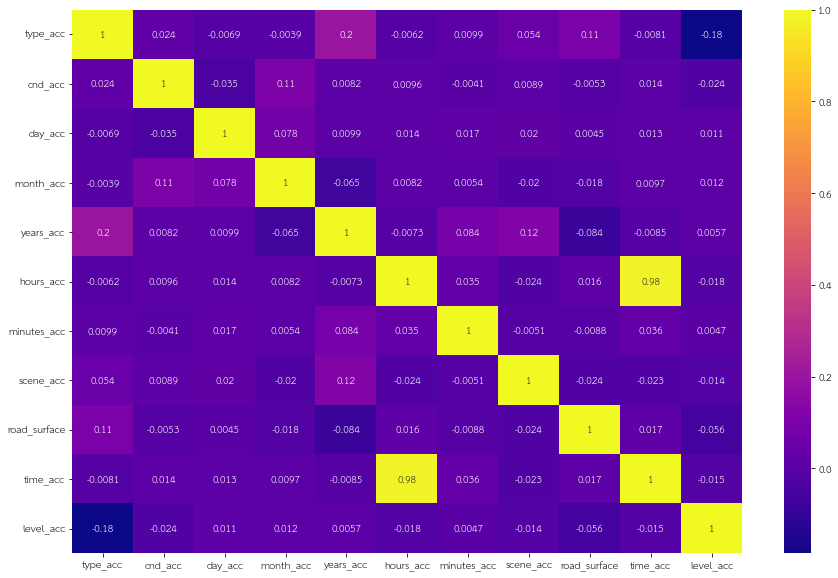

In [ ]:
# plot heatmap
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df_Htm.corr(), annot=True, cmap="plasma")
plt.show

In [ ]:
# ลบคอลัมน์ทั้งสองทิ้งเนื่องจากไม่ได้มีความสัมพันธ์มากนัก
df = df.drop(columns=["hours_acc"])
df = df.drop(columns=["minutes_acc"])

--------------------------------

#Data preprocessing และ เปรียบเทียบ model 

In [ ]:
# copy df to df_select
df_select = df.copy()

# ลบคอลัมน์ที่ไม่ใช้งาน
df_select.drop(columns=["route_acc"], inplace=True, axis=1)

In [ ]:
df_select

,type_acc,cnd_acc,day_acc,month_acc,years_acc,hours_acc,minutes_acc,scene_acc,road_surface,time_acc,level_acc
0,อื่นๆ,Fair,1,1,2019,3,5,อื่นๆ,ไม่มีความลาดชัน,0,INJ
1,อื่นๆ,Fair,1,1,2019,5,42,ทางตรง,ไม่มีความลาดชัน,1,ACC
2,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,Fair,1,1,2019,10,10,ทางตรง,ไม่มีความลาดชัน,2,ACC
3,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,Fair,1,1,2019,17,30,ทางตรง,ไม่มีความลาดชัน,4,ACC
4,รถปิคอัพบรรทุก 4 ล้อ,Fair,1,1,2019,19,20,ทางตรง,ไม่มีความลาดชัน,4,INJ
...,...,...,...,...,...,...,...,...,...,...,...
5727,อื่นๆ,Fair,29,9,2022,23,40,ทางตรง,ไม่มีความลาดชัน,5,ACC
5728,อื่นๆ,Fair,30,9,2022,9,21,ทางโค้งกว้าง,ไม่มีความลาดชัน,2,ACC
5729,รถปิคอัพบรรทุก 4 ล้อ,Fair,30,9,2022,18,4,ทางตรง,ไม่มีความลาดชัน,4,ACC
5730,อื่นๆ,Fair,30,9,2022,18,48,ทางตรง,ไม่มีความลาดชัน,4,ACC


In [ ]:
df_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5732 entries, 0 to 5731
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type_acc      5732 non-null   object
 1   cnd_acc       5732 non-null   object
 2   day_acc       5732 non-null   object
 3   month_acc     5732 non-null   object
 4   years_acc     5732 non-null   object
 5   hours_acc     5732 non-null   int64 
 6   minutes_acc   5732 non-null   int64 
 7   scene_acc     5732 non-null   object
 8   road_surface  5732 non-null   object
 9   time_acc      5732 non-null   object
 10  level_acc     5732 non-null   object
dtypes: int64(2), object(9)
memory usage: 492.7+ KB


In [ ]:
# แปลงข้อมูลให้เป็น int ตามความเหมาะสม
df_select[['day_acc', 'month_acc', 'years_acc', 'time_acc']] = df_select[['day_acc', 'month_acc', 'years_acc', 'time_acc']].astype(str).astype(int)

In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

# สร้างคอลัมน์สำหรับการ encode
df_select['type_acc'] = lab.fit_transform(df_select['type_acc'])
df_select['cnd_acc'] = lab.fit_transform(df_select['cnd_acc'])
df_select['scene_acc'] = lab.fit_transform(df_select['scene_acc'])
df_select['road_surface'] = lab.fit_transform(df_select['road_surface'])
df_select

,type_acc,cnd_acc,day_acc,month_acc,years_acc,scene_acc,road_surface,time_acc,level_acc
0,12,1,1,1,2019,11,1,0,INJ
1,12,1,1,1,2019,1,1,1,ACC
2,9,1,1,1,2019,1,1,2,ACC
3,9,1,1,1,2019,1,1,4,ACC
4,7,1,1,1,2019,1,1,4,INJ
...,...,...,...,...,...,...,...,...,...
5727,12,1,29,9,2022,1,1,5,ACC
5728,12,1,30,9,2022,9,1,2,ACC
5729,7,1,30,9,2022,1,1,4,ACC
5730,12,1,30,9,2022,1,1,4,ACC


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# เตรียมชุดข้อมูลสำหรับทำ model
x = df_select.drop(columns=["level_acc"])
y = df_select['level_acc']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.4, random_state=42)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((3439, 8), (3439,), (2293, 8), (2293,))

In [ ]:
# Logistic Regression
lg = LogisticRegression()
lg.fit(x_train, y_train)
lg_pred_score = lg.score(x_test,y_test)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
# Random Forest Classifier
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred_score = rf.score(x_test,y_test)

In [ ]:
# Gradient Boosting Classifier
gb = GradientBoostingClassifier()
gb.fit(x_train, y_train)
gb_pred_score = gb.score(x_test,y_test)

In [ ]:
gb.feature_importances_

array([0.39390479, 0.05870752, 0.14875825, 0.13560335, 0.05848752,
       0.044094  , 0.01285753, 0.14758705])

In [ ]:
gb.feature_importances_
importances = gb.feature_importances_
columns = x.columns
i = 0

while i<len(columns):
    print(f" The importance of feature '{columns[i]}' is {round(importances[i]*100, 2)}%.")
    i += 1

 The importance of feature 'type_acc' is 39.39%.
 The importance of feature 'cnd_acc' is 5.87%.
 The importance of feature 'day_acc' is 14.88%.
 The importance of feature 'month_acc' is 13.56%.
 The importance of feature 'years_acc' is 5.85%.
 The importance of feature 'scene_acc' is 4.41%.
 The importance of feature 'road_surface' is 1.29%.
 The importance of feature 'time_acc' is 14.76%.


In [ ]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)
svc_pred_score = svc.score(x_test,y_test)

In [ ]:
df_select = pd.DataFrame(dict(model=['Logistic Regression', 
                              'Random Forest',
                              'Gradient Boosting',
                              'SVM'],accuracy=[lg_pred_score, rf_pred_score,
                                               gb_pred_score, svc_pred_score]))

In [ ]:
df_select

,model,accuracy
0,Logistic Regression,0.668993
1,Random Forest,0.647623
2,Gradient Boosting,0.676843
3,SVM,0.654601


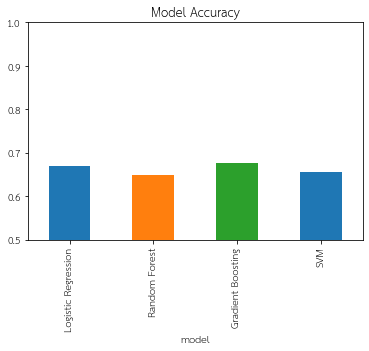

In [ ]:
df_select.plot(kind='bar',x='model',y='accuracy',title='Model Accuracy',legend=False,
        color=['#1F77B4', '#FF7F0E', '#2CA02C'])
plt.ylim(0.5,1);

--------------------------

# Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split

In [ ]:
# copy df to df_select
df_model = df.copy()

# ลบคอลัมน์ที่ไม่ใช้งาน
df_model.drop(columns=["route_acc"], inplace=True, axis=1)

In [ ]:
df_model

,type_acc,cnd_acc,day_acc,month_acc,years_acc,scene_acc,road_surface,time_acc,level_acc
0,อื่นๆ,Fair,1,1,2019,อื่นๆ,ไม่มีความลาดชัน,0,INJ
1,อื่นๆ,Fair,1,1,2019,ทางตรง,ไม่มีความลาดชัน,1,ACC
2,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,Fair,1,1,2019,ทางตรง,ไม่มีความลาดชัน,2,ACC
3,รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ,Fair,1,1,2019,ทางตรง,ไม่มีความลาดชัน,4,ACC
4,รถปิคอัพบรรทุก 4 ล้อ,Fair,1,1,2019,ทางตรง,ไม่มีความลาดชัน,4,INJ
...,...,...,...,...,...,...,...,...,...
5727,อื่นๆ,Fair,29,9,2022,ทางตรง,ไม่มีความลาดชัน,5,ACC
5728,อื่นๆ,Fair,30,9,2022,ทางโค้งกว้าง,ไม่มีความลาดชัน,2,ACC
5729,รถปิคอัพบรรทุก 4 ล้อ,Fair,30,9,2022,ทางตรง,ไม่มีความลาดชัน,4,ACC
5730,อื่นๆ,Fair,30,9,2022,ทางตรง,ไม่มีความลาดชัน,4,ACC


In [ ]:
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()

# สร้างคอลัมน์สำหรับการ encode
df_model['type_acc'] = lab.fit_transform(df_model['type_acc'])
df_model['cnd_acc'] = lab.fit_transform(df_model['cnd_acc'])
df_model['scene_acc'] = lab.fit_transform(df_model['scene_acc'])
df_model['road_surface'] = lab.fit_transform(df_model['road_surface'])

In [ ]:
# เตรียมชุดข้อมูลสำหรับทำ model
X= df_model.drop(columns=["level_acc"])
Y = df_model['level_acc']

In [ ]:
Y.value_counts()

ACC    3884
INJ    1744
DIE     104
Name: level_acc, dtype: int64

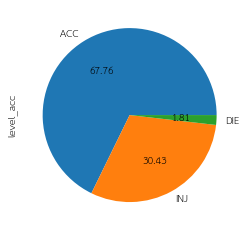

In [ ]:
# plot จำนวนระดับความรุนแรง
Y.value_counts().plot.pie(autopct='%.2f')

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

counter = Counter(Y)
counter

Counter({'INJ': 3884, 'ACC': 3884, 'DIE': 3884})

In [ ]:
Y.value_counts()

INJ    3884
ACC    3884
DIE    3884
Name: level_acc, dtype: int64

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.4, random_state=42)
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((6991, 8), (6991,), (4661, 8), (4661,))

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

In [ ]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=20, learning_rate = learning_rate, max_features=2, max_depth = 2, random_state = 0)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    print("Accuracy score (test): {0:.3f}".format(gb.score(X_test, Y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.553
Accuracy score (test): 0.556

Learning rate:  0.1
Accuracy score (training): 0.569
Accuracy score (test): 0.573

Learning rate:  0.25
Accuracy score (training): 0.625
Accuracy score (test): 0.615

Learning rate:  0.5
Accuracy score (training): 0.658
Accuracy score (test): 0.654

Learning rate:  0.75
Accuracy score (training): 0.694
Accuracy score (test): 0.682

Learning rate:  1
Accuracy score (training): 0.711
Accuracy score (test): 0.700



In [ ]:
# Learning rate = 0.5

gb = GradientBoostingClassifier(n_estimators=20, learning_rate = 1, max_features=2, max_depth = 2, random_state = 0)
gb.fit(X_train, Y_train)
predictions = gb.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification Report")
print(classification_report(Y_test, predictions))

Confusion Matrix:
[[1212   61  303]
 [  41 1353  144]
 [ 549  302  696]]

Classification Report
              precision    recall  f1-score   support

         ACC       0.67      0.77      0.72      1576
         DIE       0.79      0.88      0.83      1538
         INJ       0.61      0.45      0.52      1547

    accuracy                           0.70      4661
   macro avg       0.69      0.70      0.69      4661
weighted avg       0.69      0.70      0.69      4661



In [ ]:
gb.feature_importances_
importances = gb.feature_importances_
columns = x.columns
i = 0

while i<len(columns):
    print(f" The importance of feature '{columns[i]}' is {round(importances[i]*100, 2)}%.")
    i += 1

 The importance of feature 'type_acc' is 27.23%.
 The importance of feature 'cnd_acc' is 4.97%.
 The importance of feature 'day_acc' is 5.54%.
 The importance of feature 'month_acc' is 5.12%.
 The importance of feature 'years_acc' is 22.25%.
 The importance of feature 'scene_acc' is 2.91%.
 The importance of feature 'road_surface' is 6.99%.
 The importance of feature 'time_acc' is 25.0%.


-------------------------------

# Accident prediction

In [ ]:
def input_data(type_acc,climate_acc,day_acc,month_acc,years_acc,scene_acc,road_surface,time_acc):
  df1 = pd.DataFrame({'type_acc': [type_acc],
                   'cnd_acc': [cnd_acc],
                   'day_acc': [day_acc],
                   'month_acc':[month_acc],
                   'years_acc': [years_acc],
                   'scene_acc': [scene_acc],
                   'road_surface': [road_surface],
                   'time_acc': [time_acc]})
  return df1

In [ ]:
def clean_data2(df1):
  clean_df = input

  lab = LabelEncoder()
  clean_df['type_acc'] = lab.fit_transform(clean_df['type_acc'])
  clean_df['cnd_acc'] = lab.fit_transform(clean_df['cnd_acc'])
  clean_df['scene_acc'] = lab.fit_transform(clean_df['scene_acc'])
  clean_df['road_surface'] = lab.fit_transform(clean_df['road_surface'])

  return clean_df

In [ ]:
#@markdown <h3> กรอกข้อมูลการเกิดอุบัติเหตุ </h3>
type_acc = "\u0E23\u0E16\u0E1A\u0E23\u0E23\u0E17\u0E38\u0E01 6 \u0E25\u0E49\u0E2D" #@param ['รถยนต์นั่งส่วนบุคคล/รถยนต์นั่งสาธารณะ', 'รถปิคอัพบรรทุก 4 ล้อ','รถจักรยานยนต์','รถบรรทุกมากกว่า 10 ล้อ (รถพ่วง)','รถบรรทุก 6 ล้อ','รถบรรทุกมากกว่า 6 ล้อ ไม่เกิน 10 ล้อ','รถตู้','รถโดยสารขนาดใหญ่','รถปิคอัพโดยสาร','อื่นๆ']{allow-input: true}                            
cnd_acc =  "Fair"#@param ['Fair', 'Mostly Cloudy', 'Partly Cloudy', 'Light Rain', 'Fog','Haze', 'Cloudy', 'Showers in the Vicinity','Light Rain with Thunder', 'T-Storm / Windy', 'T-Storm','Light Rain Shower', 'Thunder', 'Heavy Rain', 'Rain','Heavy T-Storm', 'Fair / Windy', 'Light Rain Shower / Windy','Partly Cloudy / Windy', 'Smoke', 'Rain / Windy','Light Rain / Windy', 'Mostly Cloudy / Windy','Thunder in the Vicinity'] {allow-input: true}
day_acc    =  "24"#@param['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12','13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23','24', '25', '26', '27', '28', '29', '30', '31'] {allow-input: true}
month_acc =  "12"#@param ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12'] {allow-input: true}
years_acc =  "2022"#@param['2019', '2020', '2021', '2022']{allow-input: true}
scene_acc	 =  "\u0E17\u0E32\u0E07\u0E2A\u0E32\u0E21\u0E41\u0E22\u0E01 (Y)"#@param['อื่นๆ', 'ทางตรง', 'ทางโค้งกว้าง', 'ทางแยกต่างระดับ/Ramps','ทางเชื่อมเข้าพื้นที่สาธารณะ/เชิงพาณิชย์', 'ทางโค้งหักศอก','ทางสามแยก (Y)', 'ทางร่วม', 'ทางสามแยก (T)', 'จุดกลับรถต่างระดับ','ทางเชื่อมเข้าพื้นที่ส่วนบุคคล', 'ทางสี่แยก'] {allow-input: true}
road_surface	 = "\u0E44\u0E21\u0E48\u0E21\u0E35\u0E04\u0E27\u0E32\u0E21\u0E25\u0E32\u0E14\u0E0A\u0E31\u0E19" #@param ['ไม่มีความลาดชัน', 'ที่ลาดชัน'] {allow-input: true}
time_acc = "1"#@param['0', '1', '2', '3', '4', '5'] {allow-input: true}
# Rental_Yield	 =  3.75#@param {type:"number"} {allow-input: true}
input = input_data(type_acc, cnd_acc, day_acc ,month_acc, years_acc , scene_acc,road_surface, time_acc )
clean_input = clean_data2(input)
# clean_df2=clean_df.drop('Sale_Price_Sqm', axis=1).copy()
# clean_input1= clean_input1.reindex(labels=clean_df2.columns,axis=1)
# clean_input2 = clean_input1.fillna(0)
# clean_input3 = scaler.transform(clean_input2)
predictions = gb.predict(clean_input)
# predict = rdfr2.predict(clean_input3)
print('ระดับความรุนแรงของอุบัติเหตุ =', predictions)

ระดับความรุนแรงของอุบัติเหตุ = ['ACC']


----------------

#เตรียมชุดข้อมูลสำหรับการทำ Association Rule Mining

In [ ]:
df_ARM = df.copy()

In [ ]:
# Filter all rows with  level_acc 
df_ARM1 = df_ARM.query(" level_acc == 'DIE' ")
df_ARM2 = df_ARM.query(" level_acc == 'INJ' ")
df_ARM3 = df_ARM.query(" level_acc == 'ACC' ")

In [ ]:
from google.colab import files
df_ARM1.to_csv('level_acc_DIE.csv') 
files.download('level_acc_DIE.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_ARM2.to_csv('level_acc_INJ.csv') 
files.download('level_acc_INJ.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_ARM3.to_csv('level_acc_ACC.csv') 
files.download('level_acc_ACC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>